In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
bank_data = pd.read_csv("bank.csv")

In [4]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
bank_data["pdays"].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

In [8]:
bank_data["pdays"] =bank_data["pdays"].replace({999: np.NaN})

In [9]:
bank_data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
bank_data["pdays"].value_counts()

3.0     439
6.0     412
4.0     118
9.0      64
2.0      61
7.0      60
12.0     58
10.0     52
5.0      46
13.0     36
11.0     28
1.0      26
15.0     24
14.0     20
8.0      18
0.0      15
16.0     11
17.0      8
18.0      7
19.0      3
22.0      3
21.0      2
27.0      1
25.0      1
20.0      1
26.0      1
Name: pdays, dtype: int64

In [11]:
bank_data["pdays"].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
41183   NaN
41184   NaN
41185   NaN
41186   NaN
41187   NaN
Name: pdays, Length: 41188, dtype: float64>

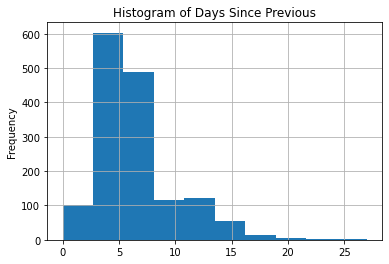

In [12]:
bank_data["pdays"].plot(kind = "hist", title = "Histogram of Days Since Previous")
plt.grid()
plt.show()

In [13]:
bank_data["education_numeric"] = bank_data["education"]

In [14]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_numeric
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic.4y
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high.school
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high.school
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic.6y
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high.school


In [15]:
dict_edu = {"education_numeric": {"illiterate": 0, "basic.4y": 4, "basic.6y": 6, "basic.9y": 9,
                                  "high.school":12 ,"professional.course": 13 ,
                                  "university.degree":16, "unknown": np.NaN}}

In [16]:
bank_data.replace(dict_edu, inplace=True)

In [17]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_numeric
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,6.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0


In [18]:
bank_data["education_numeric"].value_counts()

16.0    12168
12.0     9515
9.0      6045
13.0     5243
4.0      4176
6.0      2292
0.0        18
Name: education_numeric, dtype: int64

In [19]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_numeric
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,6.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0


In [20]:
bank_data["age_z"] = stats.zscore(bank_data["age"])

In [21]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_numeric,age_z
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.0,1.533034
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0,1.628993
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0,-0.290186
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,6.0,-0.002309
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0,1.533034


In [22]:
bank_data.query("age_z > 3 | age_z < -3" )

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_numeric,age_z
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,no,16.0,3.452213
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,1,failure,-1.8,92.843,-50.0,1.687,5099.1,no,16.0,3.164336
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no,4.0,4.603720
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes,4.0,4.603720
27805,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes,4.0,4.603720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,mon,...,1,success,-1.1,94.601,-49.5,1.000,4963.6,no,4.0,4.219885
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes,4.0,3.932008
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,1,failure,-1.1,94.601,-49.5,1.025,4963.6,yes,13.0,3.836049
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,13.0,3.164336


In [23]:
bank_data_outliers = bank_data.query("age_z > 3 | age_z < -3" )

In [24]:
bank_data_outliers.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_numeric,age_z
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,no,16.0,3.452213
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,1,failure,-1.8,92.843,-50.0,1.687,5099.1,no,16.0,3.164336
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no,4.0,4.603720
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes,4.0,4.603720
27805,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes,4.0,4.603720


In [25]:
bank_data_outliers_sort = bank_data_outliers.sort_values(["age_z"], ascending = False)

In [26]:
bank_data_outliers_sort.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_numeric,age_z
38455,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,0,nonexistent,-3.4,92.431,-26.9,0.730,5017.5,yes,4.0,5.563310
38452,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,...,2,success,-3.4,92.431,-26.9,0.730,5017.5,yes,4.0,5.563310
27826,95,retired,divorced,basic.6y,no,no,no,cellular,mar,thu,...,0,nonexistent,-1.8,92.843,-50.0,1.650,5099.1,no,6.0,5.275433
38921,94,retired,married,basic.9y,no,no,no,cellular,nov,wed,...,1,failure,-3.4,92.649,-30.1,0.716,5017.5,no,9.0,5.179474
40469,92,retired,married,unknown,no,no,yes,cellular,aug,wed,...,4,success,-1.7,94.027,-38.3,0.903,4991.6,yes,NaN,4.987556
40450,92,retired,married,unknown,no,no,yes,cellular,aug,tue,...,1,success,-1.7,94.027,-38.3,0.904,4991.6,yes,NaN,4.987556
39655,92,retired,married,unknown,no,yes,no,cellular,may,thu,...,2,success,-1.8,93.876,-40.0,0.683,5008.7,no,NaN,4.987556
39734,92,retired,divorced,unknown,unknown,no,no,cellular,may,wed,...,1,failure,-1.8,93.876,-40.0,0.697,5008.7,yes,NaN,4.987556
38022,91,retired,married,university.degree,no,yes,yes,cellular,sep,wed,...,2,failure,-3.4,92.379,-29.8,0.781,5017.5,no,16.0,4.891597
38032,91,retired,married,university.degree,no,no,yes,cellular,sep,wed,...,0,nonexistent,-3.4,92.379,-29.8,0.781,5017.5,no,16.0,4.891597


In [27]:
bank_data_outliers_sort[["age", "marital"]].head(20)

,age,marital
38455,98,married
38452,98,married
27826,95,divorced
38921,94,married
40469,92,married
40450,92,married
39655,92,married
39734,92,divorced
38022,91,married
38032,91,married


In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
min_max_age = scaler.fit_transform(bank_data[["age"]])

In [31]:
min_max_age

array([[0.48148148],
       [0.49382716],
       [0.24691358],
       ...,
       [0.48148148],
       [0.33333333],
       [0.7037037 ]])

In [32]:
bank_data["min_max_age"] = min_max_age

In [33]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_numeric,age_z,min_max_age
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.0,1.533034,0.481481
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0,1.628993,0.493827
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0,-0.290186,0.246914
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,6.0,-0.002309,0.283951
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0,1.533034,0.481481


In [34]:
bank_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_numeric,age_z,min_max_age
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.0,1.533034,0.481481
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0,1.628993,0.493827
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0,-0.290186,0.246914
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,6.0,-0.002309,0.283951
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0,1.533034,0.481481
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,9.0,0.477486,0.345679
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,13.0,1.820911,0.518519
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,0.093650,0.296296
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,13.0,-1.537652,0.086420
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0,-1.441693,0.098765


In [35]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'education_numeric',
       'age_z', 'min_max_age'],
      dtype='object')

In [36]:
bank_data.info()
#bank_data.columns
#bank_data.describe()
#bank_data.shape
#bank_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   job                41188 non-null  object 
 2   marital            41188 non-null  object 
 3   education          41188 non-null  object 
 4   default            41188 non-null  object 
 5   housing            41188 non-null  object 
 6   loan               41188 non-null  object 
 7   contact            41188 non-null  object 
 8   month              41188 non-null  object 
 9   day_of_week        41188 non-null  object 
 10  duration           41188 non-null  int64  
 11  campaign           41188 non-null  int64  
 12  pdays              1515 non-null   float64
 13  previous           41188 non-null  int64  
 14  poutcome           41188 non-null  object 
 15  emp.var.rate       41188 non-null  float64
 16  cons.price.idx     411

In [37]:
bank_data_1 = bank_data

In [38]:
bank_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   job                41188 non-null  object 
 2   marital            41188 non-null  object 
 3   education          41188 non-null  object 
 4   default            41188 non-null  object 
 5   housing            41188 non-null  object 
 6   loan               41188 non-null  object 
 7   contact            41188 non-null  object 
 8   month              41188 non-null  object 
 9   day_of_week        41188 non-null  object 
 10  duration           41188 non-null  int64  
 11  campaign           41188 non-null  int64  
 12  pdays              1515 non-null   float64
 13  previous           41188 non-null  int64  
 14  poutcome           41188 non-null  object 
 15  emp.var.rate       41188 non-null  float64
 16  cons.price.idx     411

In [39]:
df = bank_data_1.drop(["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"], axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   duration           41188 non-null  int64  
 2   campaign           41188 non-null  int64  
 3   pdays              1515 non-null   float64
 4   previous           41188 non-null  int64  
 5   emp.var.rate       41188 non-null  float64
 6   cons.price.idx     41188 non-null  float64
 7   cons.conf.idx      41188 non-null  float64
 8   euribor3m          41188 non-null  float64
 9   nr.employed        41188 non-null  float64
 10  education_numeric  39457 non-null  float64
 11  age_z              41188 non-null  float64
 12  min_max_age        41188 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 4.1 MB


In [41]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_numeric,age_z,min_max_age
0,56,261,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,4.0,1.533034,0.481481
1,57,149,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,12.0,1.628993,0.493827
2,37,226,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,12.0,-0.290186,0.246914
3,40,151,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,6.0,-0.002309,0.283951
4,56,307,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,12.0,1.533034,0.481481


In [42]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_numeric,age_z,min_max_age
count,41188.00000,41188.000000,41188.000000,1515.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,39457.000000,4.118800e+04,41188.000000
mean,40.02406,258.285010,2.567593,6.014521,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,11.706110,2.846557e-16,0.284248
std,10.42125,259.279249,2.770014,3.824906,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,3.910288,1.000012e+00,0.128657
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,-2.209365e+00,0.000000
25%,32.00000,102.000000,1.000000,3.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,9.000000,-7.699804e-01,0.185185
50%,38.00000,180.000000,2.000000,6.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,12.000000,-1.942267e-01,0.259259
75%,47.00000,319.000000,3.000000,7.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,16.000000,6.694038e-01,0.370370
max,98.00000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,16.000000,5.563310e+00,1.000000


In [43]:
df["duration_z"] = stats.zscore(df["duration"])

In [44]:
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_numeric,age_z,min_max_age,duration_z
0,56,261,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,4.0,1.533034,0.481481,0.010471
1,57,149,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,12.0,1.628993,0.493827,-0.421501
2,37,226,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,12.0,-0.290186,0.246914,-0.124520
3,40,151,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,6.0,-0.002309,0.283951,-0.413787
4,56,307,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,12.0,1.533034,0.481481,0.187888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,NaN,0,-1.1,94.767,-50.8,1.028,4963.6,13.0,3.164336,0.691358,0.292025
41184,46,383,1,NaN,0,-1.1,94.767,-50.8,1.028,4963.6,13.0,0.573445,0.358025,0.481012
41185,56,189,2,NaN,0,-1.1,94.767,-50.8,1.028,4963.6,16.0,1.533034,0.481481,-0.267225
41186,44,442,1,NaN,0,-1.1,94.767,-50.8,1.028,4963.6,13.0,0.381527,0.333333,0.708569


In [45]:
df.query("duration_z > 3 | duration_z < -3" )

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_numeric,age_z,min_max_age,duration_z
37,52,1666,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,9.0,1.149199,0.432099,5.429405
75,41,1575,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,4.0,0.093650,0.296296,5.078428
83,49,1042,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,16.0,0.861322,0.395062,3.022704
88,49,1467,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,9.0,0.861322,0.395062,4.661884
164,39,2033,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,12.0,-0.098268,0.271605,6.844885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40880,28,1246,2,NaN,0,-1.1,94.601,-49.5,0.959,4963.6,12.0,-1.153816,0.135802,3.809510
40970,24,1176,3,3.0,2,-1.1,94.601,-49.5,0.993,4963.6,16.0,-1.537652,0.086420,3.539528
41121,46,1166,3,NaN,1,-1.1,94.767,-50.8,1.046,4963.6,16.0,0.573445,0.358025,3.500959
41123,36,1556,4,NaN,0,-1.1,94.767,-50.8,1.046,4963.6,6.0,-0.386145,0.234568,5.005147


In [46]:
df_outliers = df.query("duration_z > 3 | duration_z < -3" )

In [47]:
df_outliers.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_numeric,age_z,min_max_age,duration_z
37,52,1666,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,9.0,1.149199,0.432099,5.429405
75,41,1575,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,4.0,0.093650,0.296296,5.078428
83,49,1042,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,16.0,0.861322,0.395062,3.022704
88,49,1467,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,9.0,0.861322,0.395062,4.661884
164,39,2033,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,12.0,-0.098268,0.271605,6.844885


In [48]:
df_outliers_sort = df_outliers.sort_values(["duration_z"], ascending = False)

In [49]:
df_outliers_sort.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_numeric,age_z,min_max_age,duration_z
24091,33,4918,1,NaN,0,-0.1,93.200,-42.0,4.406,5195.8,13.0,-0.674021,0.197531,17.972019
22192,52,4199,3,NaN,0,1.4,93.444,-36.1,4.963,5228.1,4.0,1.149199,0.432099,15.198913
40537,27,3785,1,NaN,0,-1.7,94.027,-38.3,0.888,4991.6,12.0,-1.249775,0.123457,13.602160
13820,31,3643,1,NaN,0,1.4,93.918,-42.7,4.963,5228.1,13.0,-0.865939,0.172840,13.054481
7727,37,3631,2,NaN,0,1.1,93.994,-36.4,4.864,5191.0,13.0,-0.290186,0.246914,13.008198
36043,28,3509,2,3.0,2,-1.8,92.893,-46.2,1.266,5099.1,9.0,-1.153816,0.135802,12.537658
19632,47,3422,1,NaN,0,1.4,93.444,-36.1,4.968,5228.1,12.0,0.669404,0.370370,12.202108
2313,39,3366,3,NaN,0,1.1,93.994,-36.4,4.856,5191.0,4.0,-0.098268,0.271605,11.986122
20996,47,3322,1,NaN,0,1.4,93.444,-36.1,4.964,5228.1,12.0,0.669404,0.370370,11.816419
24043,27,3284,1,NaN,0,-0.1,93.798,-40.4,4.912,5195.8,13.0,-1.249775,0.123457,11.669857


In [50]:
df_outliers_sort["duration_z"].value_counts()

3.269545    6
3.655235    5
3.323542    5
3.169266    5
3.362111    5
           ..
3.601238    1
7.427275    1
3.728516    1
4.820016    1
5.734100    1
Name: duration_z, Length: 515, dtype: int64

In [51]:
df_outliers_sort["duration_z"].value_counts

<bound method IndexOpsMixin.value_counts of 24091    17.972019
22192    15.198913
40537    13.602160
13820    13.054481
7727     13.008198
           ...    
32638     3.007277
20756     3.007277
16326     3.003420
17612     3.003420
23636     3.003420
Name: duration_z, Length: 861, dtype: float64>

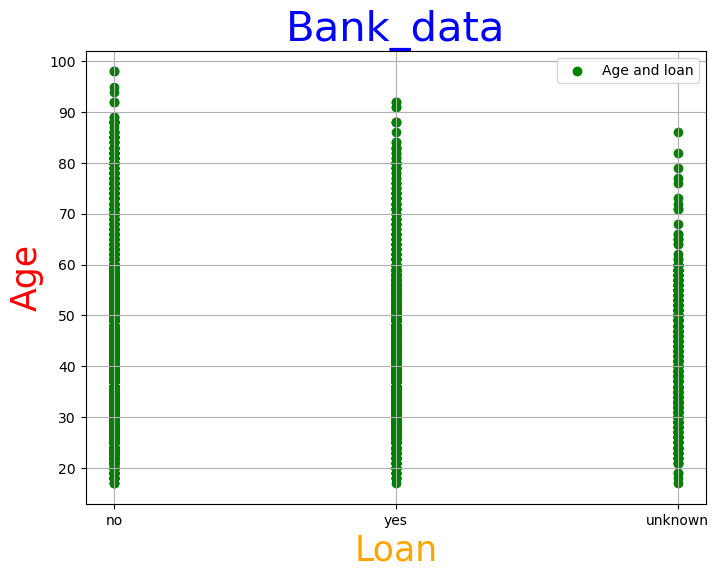

In [52]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["loan"], bank_data["age"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("Loan", size=25, c="orange")

plt.ylabel("Age", size=25, c="red")

plt.legend(["Age and loan"], loc = "upper right")

plt.grid()

plt.show()

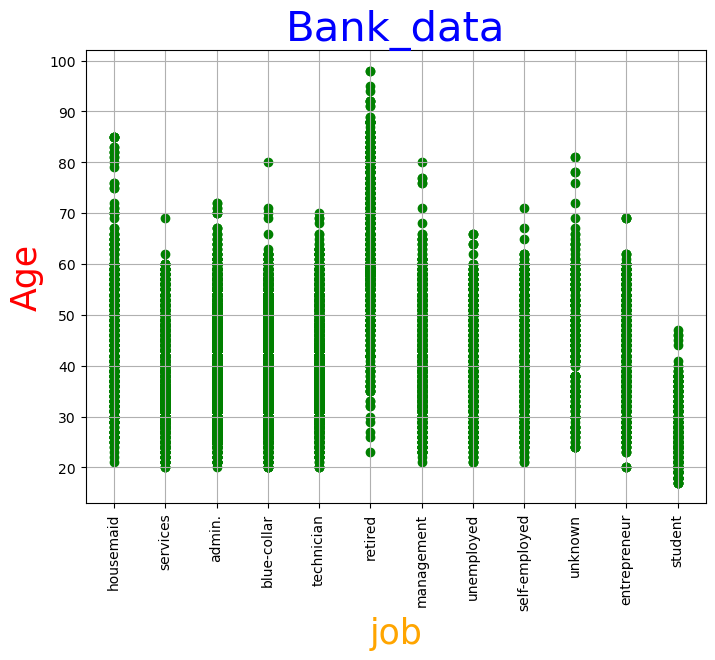

In [53]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["job"], bank_data["age"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("job", size=25, c="orange")

plt.ylabel("Age", size=25, c="red")

plt.xticks(rotation = 90)

plt.grid()

plt.show()

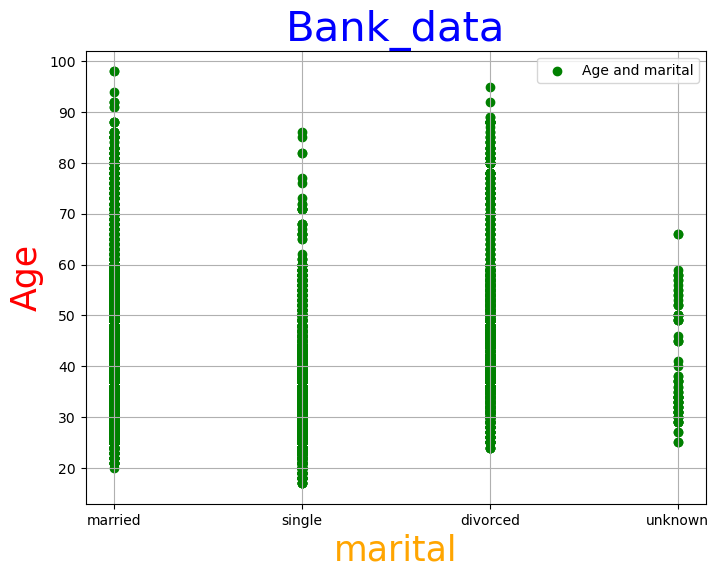

In [54]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["marital"], bank_data["age"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("marital", size=25, c="orange")

plt.ylabel("Age", size=25, c="red")

plt.legend(["Age and marital"], loc = "upper right")

plt.grid()

plt.show()

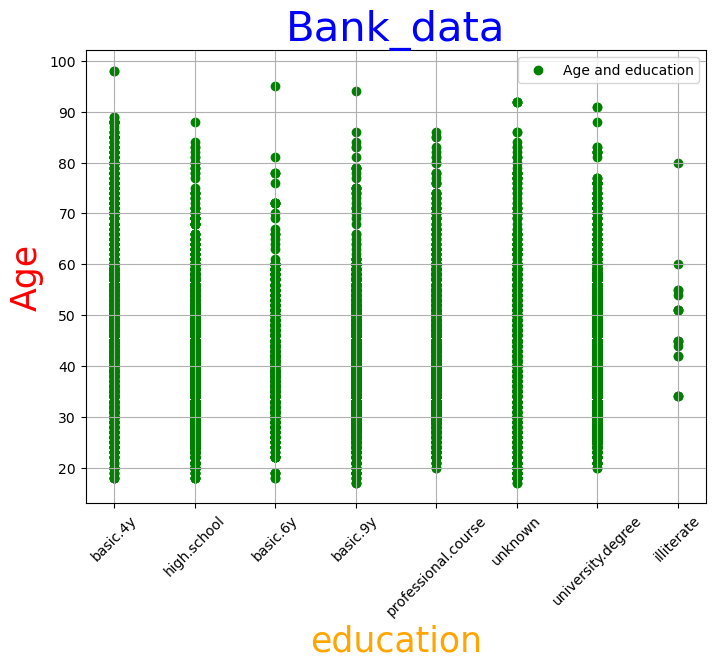

In [55]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["education"], bank_data["age"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("education", size=25, c="orange")

plt.ylabel("Age", size=25, c="red")

plt.legend(["Age and education"], loc = "upper right")

plt.xticks(rotation=45)

plt.grid()

plt.show()

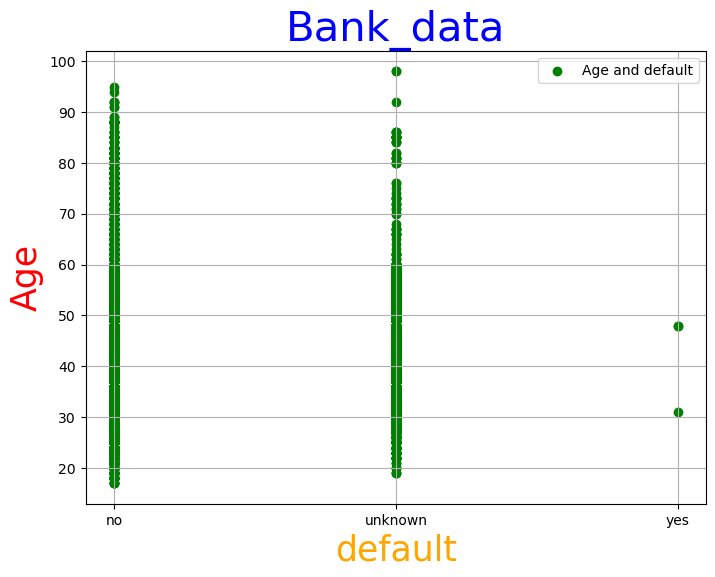

In [56]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["default"], bank_data["age"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("default", size=25, c="orange")

plt.ylabel("Age", size=25, c="red")

plt.legend(["Age and default"], loc = "upper right")

plt.grid()

plt.show()

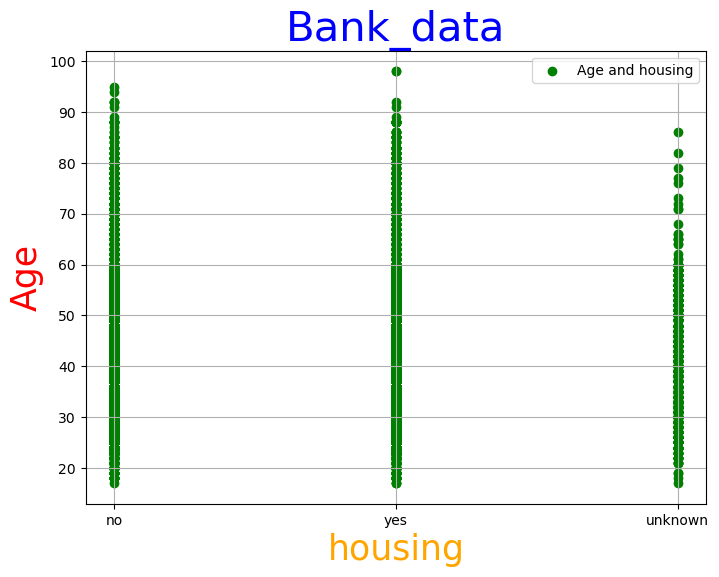

In [57]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["housing"], bank_data["age"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("housing", size=25, c="orange")

plt.ylabel("Age", size=25, c="red")

plt.legend(["Age and housing"], loc = "upper right")

plt.grid()

plt.show()

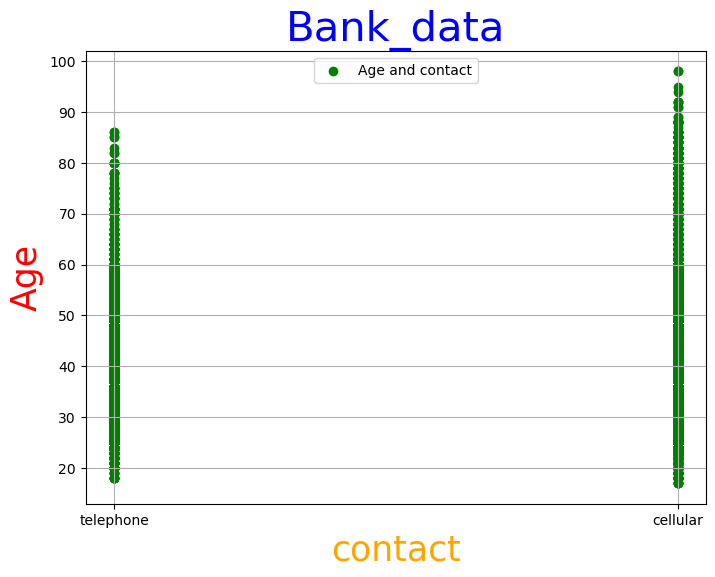

In [58]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["contact"], bank_data["age"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("contact", size=25, c="orange")

plt.ylabel("Age", size=25, c="red")

plt.legend(["Age and contact"], loc = "upper center")

plt.grid()

plt.show()

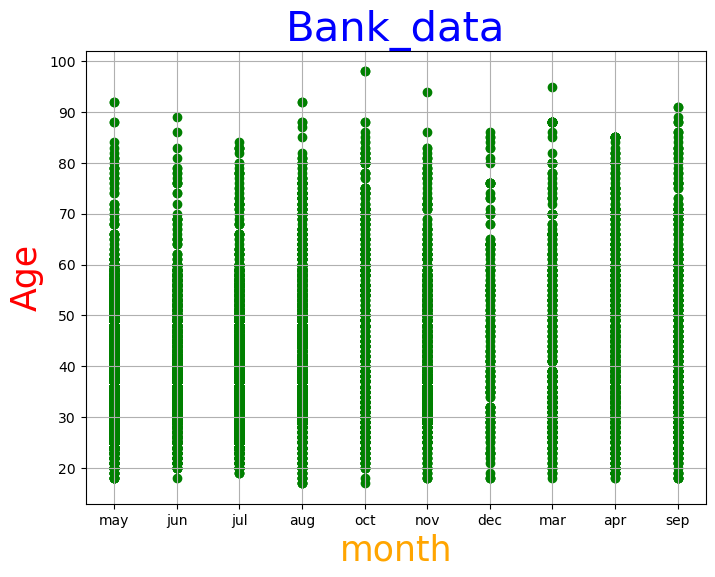

In [59]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["month"], bank_data["age"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("month", size=25, c="orange")

plt.ylabel("Age", size=25, c="red")


plt.grid()

plt.show()

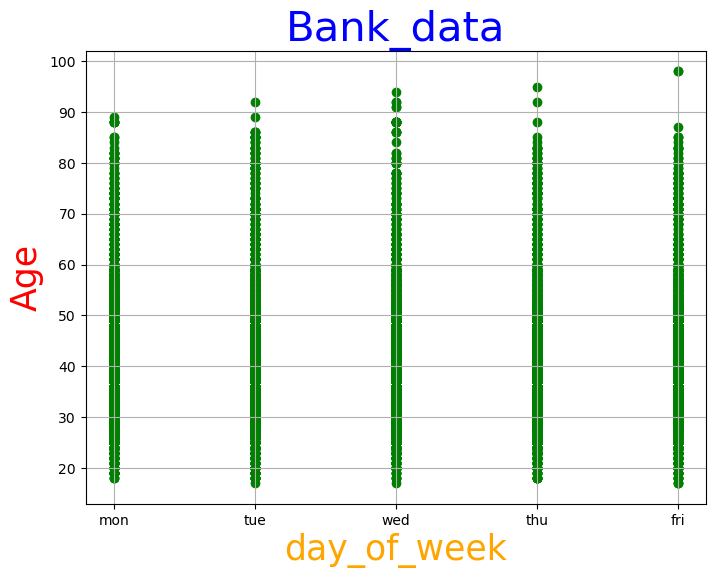

In [60]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["day_of_week"], bank_data["age"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("day_of_week", size=25, c="orange")

plt.ylabel("Age", size=25, c="red")

plt.grid()

plt.show()

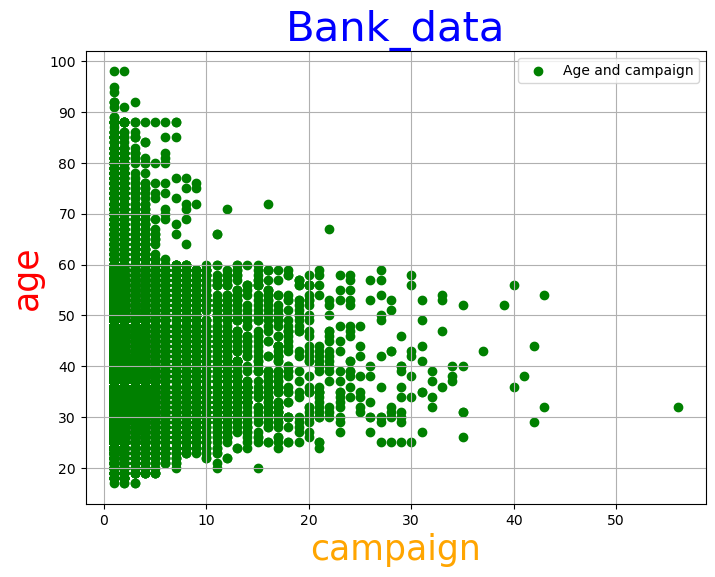

In [61]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["campaign"], bank_data["age"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("campaign", size=25, c="orange")

plt.ylabel("age", size=25, c="red")

plt.legend(["Age and campaign"], loc = "upper right")

plt.grid()

plt.show()

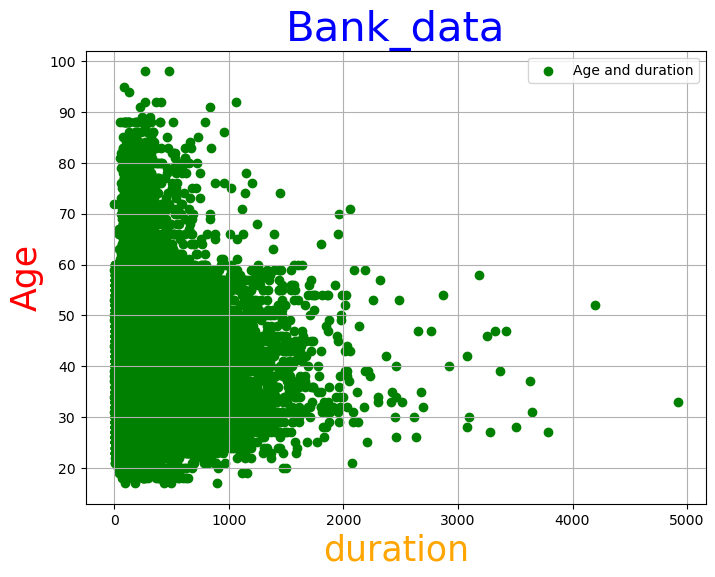

In [62]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["duration"], bank_data["age"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("duration", size=25, c="orange")

plt.ylabel("Age", size=25, c="red")

plt.legend(["Age and duration"], loc = "upper right")

plt.grid()

plt.show()

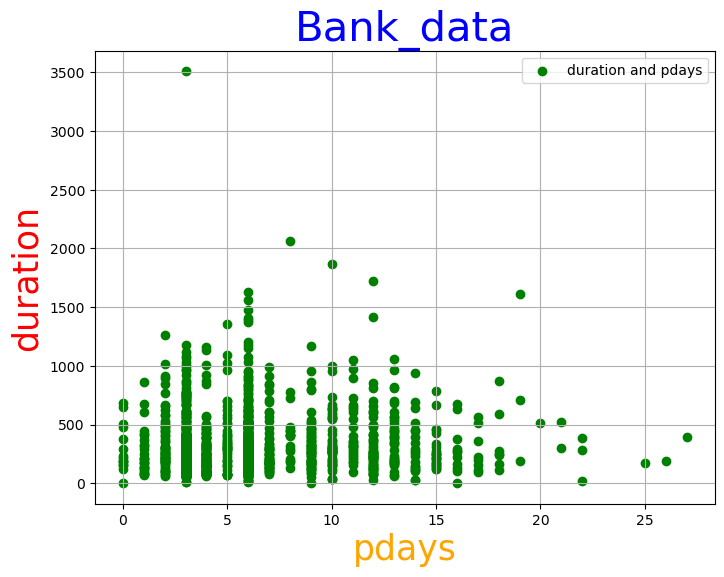

In [63]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["pdays"], bank_data["duration"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("pdays", size=25, c="orange")

plt.ylabel("duration", size=25, c="red")

plt.legend(["duration and pdays"], loc = "upper right")

plt.grid()

plt.show()

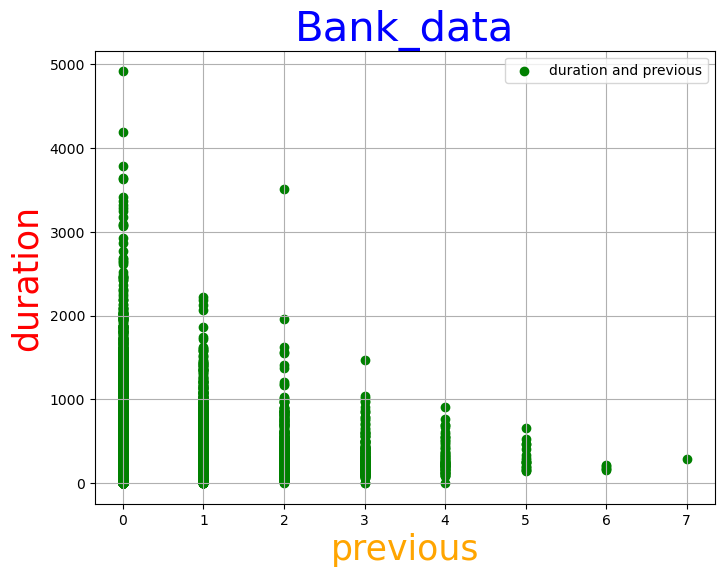

In [64]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["previous"], bank_data["duration"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("previous", size=25, c="orange")

plt.ylabel("duration", size=25, c="red")

plt.legend(["duration and previous"], loc = "upper right")

plt.grid()

plt.show()

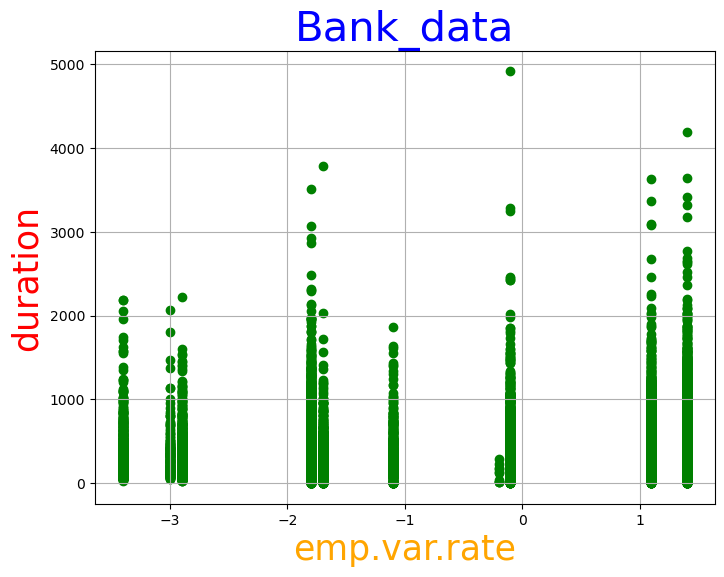

In [65]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["emp.var.rate"], bank_data["duration"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("emp.var.rate", size=25, c="orange")

plt.ylabel("duration", size=25, c="red")

plt.grid()

plt.show()

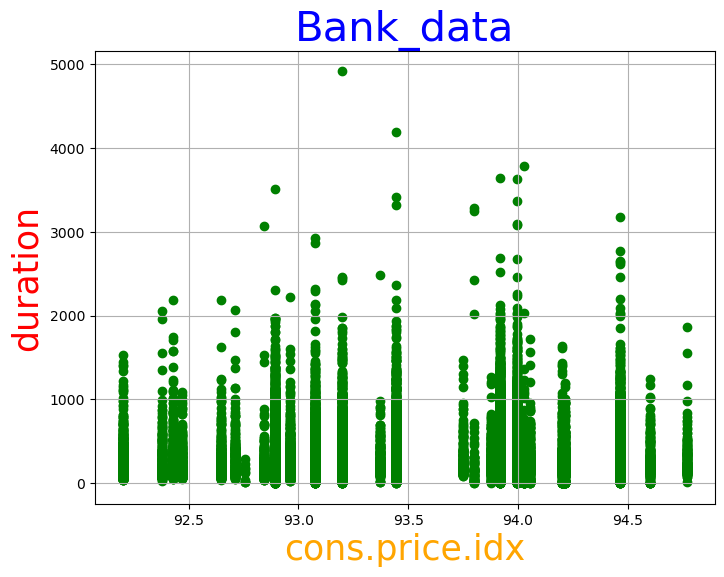

In [66]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["cons.price.idx"], bank_data["duration"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("cons.price.idx", size=25, c="orange")

plt.ylabel("duration", size=25, c="red")

plt.grid()

plt.show()

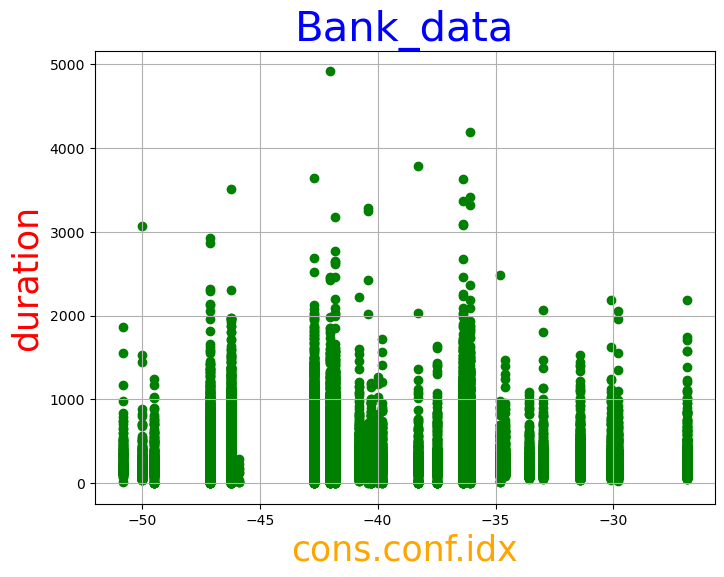

In [67]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["cons.conf.idx"], bank_data["duration"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("cons.conf.idx", size=25, c="orange")

plt.ylabel("duration", size=25, c="red")

plt.grid()

plt.show()

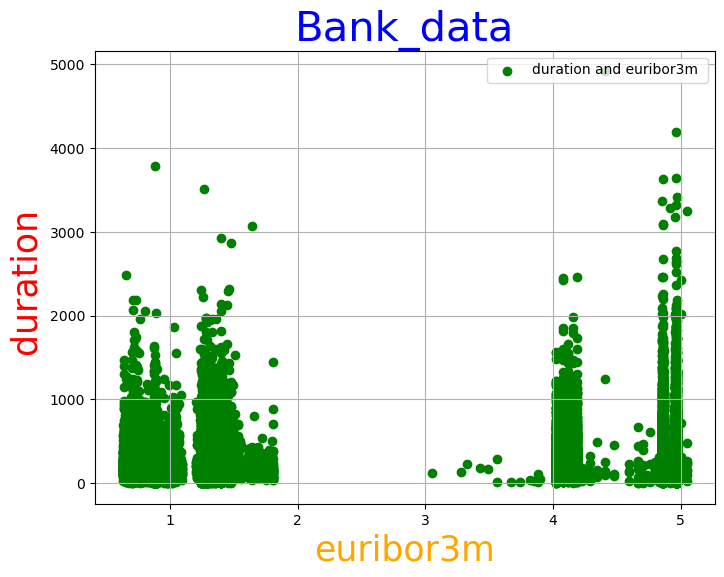

In [68]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["euribor3m"], bank_data["duration"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("euribor3m", size=25, c="orange")

plt.ylabel("duration ", size=25, c="red")

plt.legend(["duration and euribor3m "], loc = "upper right")

plt.grid()

plt.show()

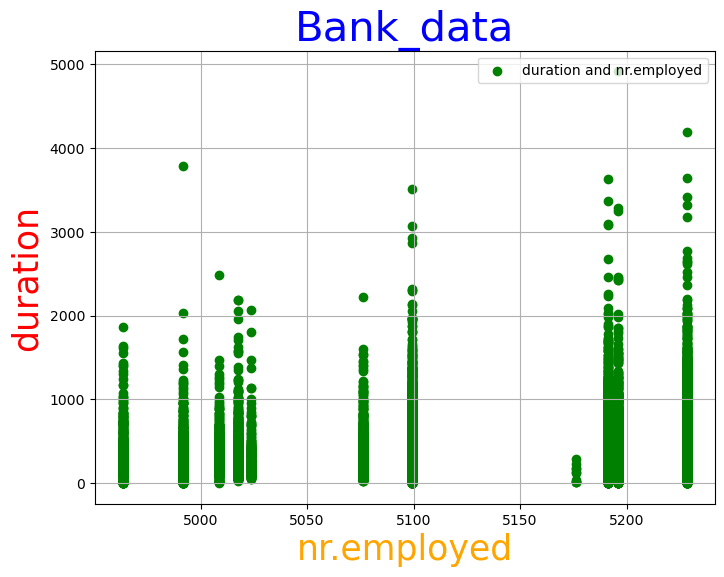

In [69]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["nr.employed"], bank_data["duration"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("nr.employed", size=25, c="orange")

plt.ylabel("duration", size=25, c="red")

plt.legend(["duration and nr.employed"], loc = "upper right")

plt.grid()

plt.show()

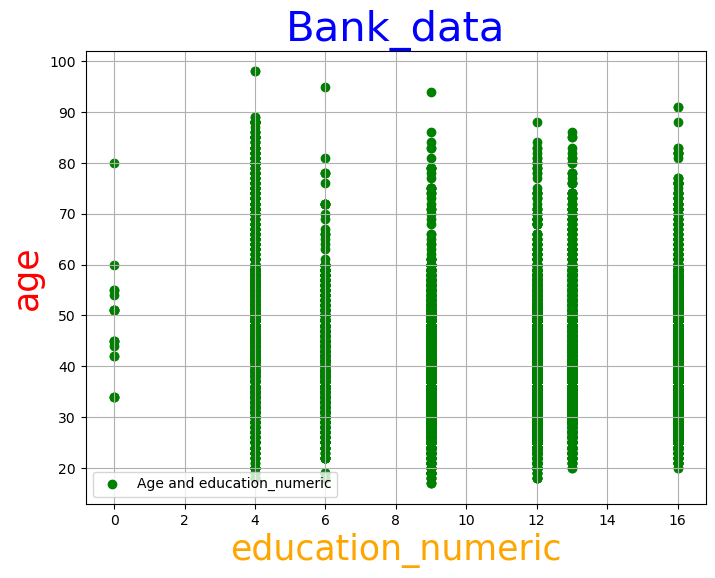

In [70]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["education_numeric"], bank_data["age"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("education_numeric", size=25, c="orange")

plt.ylabel("age", size=25, c="red")

plt.legend(["Age and education_numeric"], loc = "lower left")

plt.grid()

plt.show()

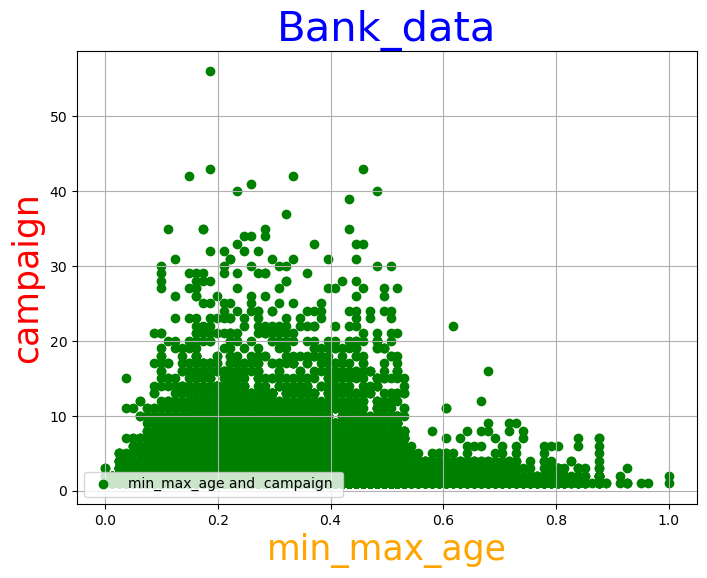

In [71]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["min_max_age"], bank_data["campaign"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("min_max_age", size=25, c="orange")

plt.ylabel("campaign", size=25, c="red")

plt.legend(["min_max_age and  campaign "], loc = "lower left")

plt.grid()

plt.show()

In [72]:
small = bank_data["age"].nsmallest(10)
small

37140    17
37539    17
37558    17
37579    17
38274    17
24110    18
27792    18
30142    18
30349    18
35871    18
Name: age, dtype: int64

In [73]:
large = bank_data["age"].nlargest(5)
large

38452    98
38455    98
27826    95
38921    94
39655    92
Name: age, dtype: int64

In [74]:
df["campaign_z"] = stats.zscore(df["campaign"])

In [75]:
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_numeric,age_z,min_max_age,duration_z,campaign_z
0,56,261,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,4.0,1.533034,0.481481,0.010471,-0.565922
1,57,149,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,12.0,1.628993,0.493827,-0.421501,-0.565922
2,37,226,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,12.0,-0.290186,0.246914,-0.124520,-0.565922
3,40,151,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,6.0,-0.002309,0.283951,-0.413787,-0.565922
4,56,307,1,NaN,0,1.1,93.994,-36.4,4.857,5191.0,12.0,1.533034,0.481481,0.187888,-0.565922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,NaN,0,-1.1,94.767,-50.8,1.028,4963.6,13.0,3.164336,0.691358,0.292025,-0.565922
41184,46,383,1,NaN,0,-1.1,94.767,-50.8,1.028,4963.6,13.0,0.573445,0.358025,0.481012,-0.565922
41185,56,189,2,NaN,0,-1.1,94.767,-50.8,1.028,4963.6,16.0,1.533034,0.481481,-0.267225,-0.204909
41186,44,442,1,NaN,0,-1.1,94.767,-50.8,1.028,4963.6,13.0,0.381527,0.333333,0.708569,-0.565922


In [76]:
df.query("campaign_z > 3 | campaign_z < -3" )

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_numeric,age_z,min_max_age,duration_z,campaign_z
2189,56,10,11,NaN,0,1.1,93.994,-36.4,4.857,5191.0,9.0,1.533034,0.481481,-0.957609,3.044213
2234,47,24,12,NaN,0,1.1,93.994,-36.4,4.857,5191.0,16.0,0.669404,0.370370,-0.903612,3.405226
2554,31,101,13,NaN,0,1.1,93.994,-36.4,4.856,5191.0,12.0,-0.865939,0.172840,-0.606631,3.766239
2589,47,69,11,NaN,0,1.1,93.994,-36.4,4.856,5191.0,12.0,0.669404,0.370370,-0.730052,3.044213
2590,47,15,11,NaN,0,1.1,93.994,-36.4,4.856,5191.0,13.0,0.669404,0.370370,-0.938324,3.044213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37587,28,140,11,NaN,0,-2.9,92.201,-31.4,0.869,5076.2,13.0,-1.153816,0.135802,-0.456213,3.044213
37876,29,121,12,NaN,0,-2.9,92.201,-31.4,0.821,5076.2,16.0,-1.057857,0.148148,-0.529493,3.405226
37893,52,513,13,14.0,2,-3.4,92.379,-29.8,0.819,5017.5,NaN,1.149199,0.432099,0.982408,3.766239
40063,21,173,11,9.0,2,-1.7,94.215,-40.3,0.810,4991.6,NaN,-1.825529,0.049383,-0.328935,3.044213


In [77]:
df_outliers_2 = df.query("campaign_z > 3 | campaign_z < -3" )

In [78]:
df_outliers_2.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_numeric,age_z,min_max_age,duration_z,campaign_z
2189,56,10,11,NaN,0,1.1,93.994,-36.4,4.857,5191.0,9.0,1.533034,0.481481,-0.957609,3.044213
2234,47,24,12,NaN,0,1.1,93.994,-36.4,4.857,5191.0,16.0,0.669404,0.370370,-0.903612,3.405226
2554,31,101,13,NaN,0,1.1,93.994,-36.4,4.856,5191.0,12.0,-0.865939,0.172840,-0.606631,3.766239
2589,47,69,11,NaN,0,1.1,93.994,-36.4,4.856,5191.0,12.0,0.669404,0.370370,-0.730052,3.044213
2590,47,15,11,NaN,0,1.1,93.994,-36.4,4.856,5191.0,13.0,0.669404,0.370370,-0.938324,3.044213


In [79]:
df_outliers_2_sort = df_outliers_2.sort_values(["campaign_z"], ascending = False)

In [80]:
df_outliers_2_sort.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_numeric,age_z,min_max_age,duration_z,campaign_z
4107,32,261,56,NaN,0,1.1,93.994,-36.4,4.858,5191.0,16.0,-0.769980,0.185185,0.010471,19.289818
18728,54,65,43,NaN,0,1.4,93.918,-42.7,4.968,5228.1,16.0,1.341116,0.456790,-0.745479,14.596643
13447,32,16,43,NaN,0,1.4,93.918,-42.7,4.962,5228.1,16.0,-0.769980,0.185185,-0.934467,14.596643
4168,29,124,42,NaN,0,1.1,93.994,-36.4,4.858,5191.0,13.0,-1.057857,0.148148,-0.517923,14.235629
5304,44,147,42,NaN,0,1.1,93.994,-36.4,4.857,5191.0,9.0,0.381527,0.333333,-0.429214,14.235629
11033,38,25,41,NaN,0,1.4,94.465,-41.8,4.962,5228.1,4.0,-0.194227,0.259259,-0.899755,13.874616
18754,36,18,40,NaN,0,1.4,93.918,-42.7,4.968,5228.1,16.0,-0.386145,0.234568,-0.926753,13.513602
11769,56,13,40,NaN,0,1.4,94.465,-41.8,4.959,5228.1,13.0,1.533034,0.481481,-0.946038,13.513602
4114,52,44,39,NaN,0,1.1,93.994,-36.4,4.858,5191.0,16.0,1.149199,0.432099,-0.826474,13.152589
11593,43,17,37,NaN,0,1.4,94.465,-41.8,4.959,5228.1,12.0,0.285568,0.320988,-0.930610,12.430562


In [81]:
df_outliers_2_sort

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_numeric,age_z,min_max_age,duration_z,campaign_z
4107,32,261,56,NaN,0,1.1,93.994,-36.4,4.858,5191.0,16.0,-0.769980,0.185185,0.010471,19.289818
18728,54,65,43,NaN,0,1.4,93.918,-42.7,4.968,5228.1,16.0,1.341116,0.456790,-0.745479,14.596643
13447,32,16,43,NaN,0,1.4,93.918,-42.7,4.962,5228.1,16.0,-0.769980,0.185185,-0.934467,14.596643
4168,29,124,42,NaN,0,1.1,93.994,-36.4,4.858,5191.0,13.0,-1.057857,0.148148,-0.517923,14.235629
5304,44,147,42,NaN,0,1.1,93.994,-36.4,4.857,5191.0,9.0,0.381527,0.333333,-0.429214,14.235629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23209,42,265,11,NaN,0,1.4,93.444,-36.1,4.965,5228.1,13.0,0.189609,0.308642,0.025899,3.044213
23232,37,109,11,NaN,0,1.4,93.444,-36.1,4.965,5228.1,13.0,-0.290186,0.246914,-0.575776,3.044213
17853,35,100,11,NaN,0,1.4,93.918,-42.7,4.961,5228.1,12.0,-0.482104,0.222222,-0.610488,3.044213
23260,44,18,11,NaN,0,1.4,93.444,-36.1,4.964,5228.1,16.0,0.381527,0.333333,-0.926753,3.044213


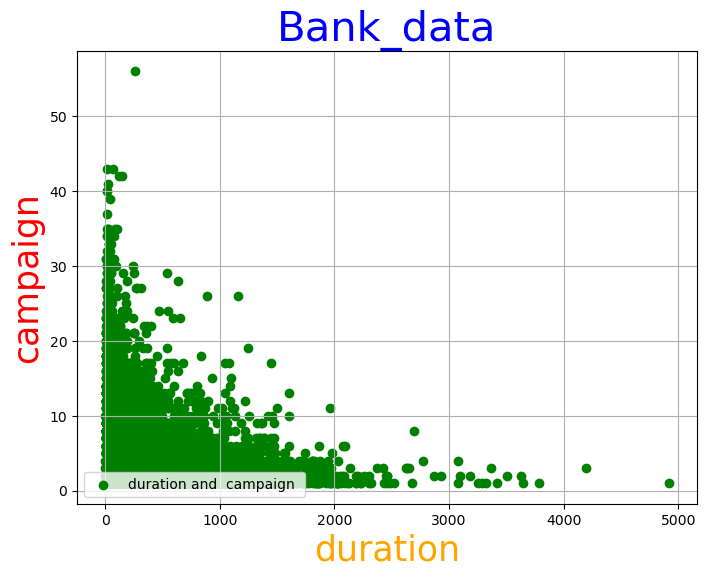

In [82]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["duration"], bank_data["campaign"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("duration", size=25, c="orange")

plt.ylabel("campaign", size=25, c="red")

plt.legend(["duration and  campaign "], loc = "lower left")

plt.grid()

plt.show()

In [83]:
pd.set_option('max_columns', None)
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_numeric,age_z,min_max_age
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.0,1.533034,0.481481
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0,1.628993,0.493827
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0,-0.290186,0.246914
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,6.0,-0.002309,0.283951
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,12.0,1.533034,0.481481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,13.0,3.164336,0.691358
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,13.0,0.573445,0.358025
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,16.0,1.533034,0.481481
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,13.0,0.381527,0.333333


In [84]:
pd.set_option('max_columns', 2)
bank_data

,age,...,min_max_age
0,56,...,0.481481
1,57,...,0.493827
2,37,...,0.246914
3,40,...,0.283951
4,56,...,0.481481
...,...,...,...
41183,73,...,0.691358
41184,46,...,0.358025
41185,56,...,0.481481
41186,44,...,0.333333


In [85]:
#pd.reset_option(“max_columns”)
#movies.head()

In [86]:
#pd.set_option('max_rows', None)
#bank_data

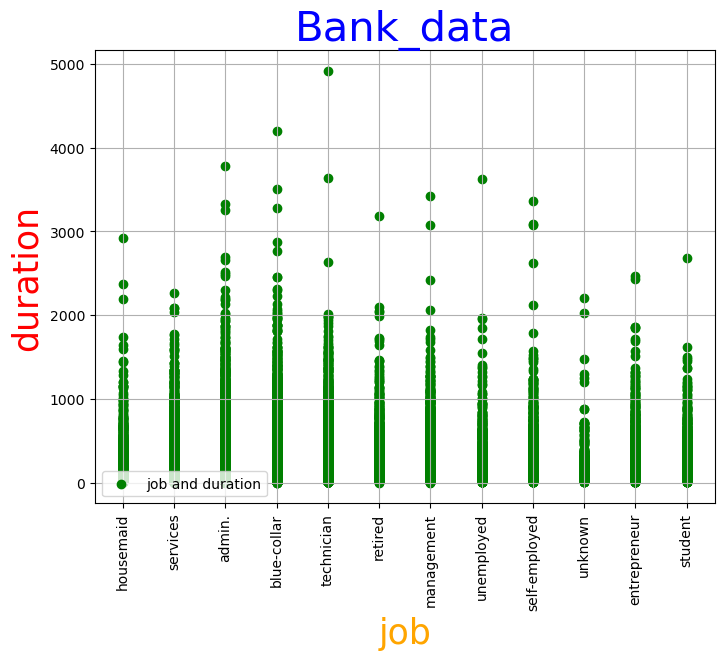

In [87]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["job"], bank_data["duration"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("job", size=25, c="orange")

plt.ylabel("duration", size=25, c="red")

plt.legend(["job and duration"], loc = "lower left")

plt.xticks(rotation=90)

plt.grid()

plt.show()

In [88]:
pd.set_option('max_colwidth', None)
bank_data[['y', 'job']]

,y,job
0,no,housemaid
1,no,services
2,no,services
3,no,admin.
4,no,services
...,...,...
41183,yes,retired
41184,no,blue-collar
41185,no,retired
41186,yes,technician


In [89]:
#bank_data.groupby(["job","y"]).get_group(("unemployed","no"))

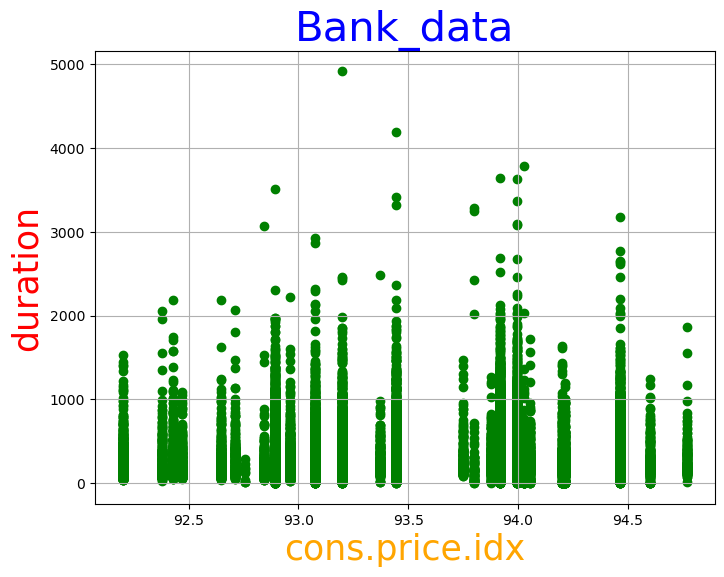

In [90]:
plt.figure(figsize=(8,6,),dpi=100)

plt.scatter(bank_data["cons.price.idx"], bank_data["duration"], c="green")
 
plt.title("Bank_data", size=30, c="blue")

plt.xlabel("cons.price.idx", size=25, c="orange")

plt.ylabel("duration", size=25, c="red")

plt.grid()

plt.show()

Correlation Matrix 



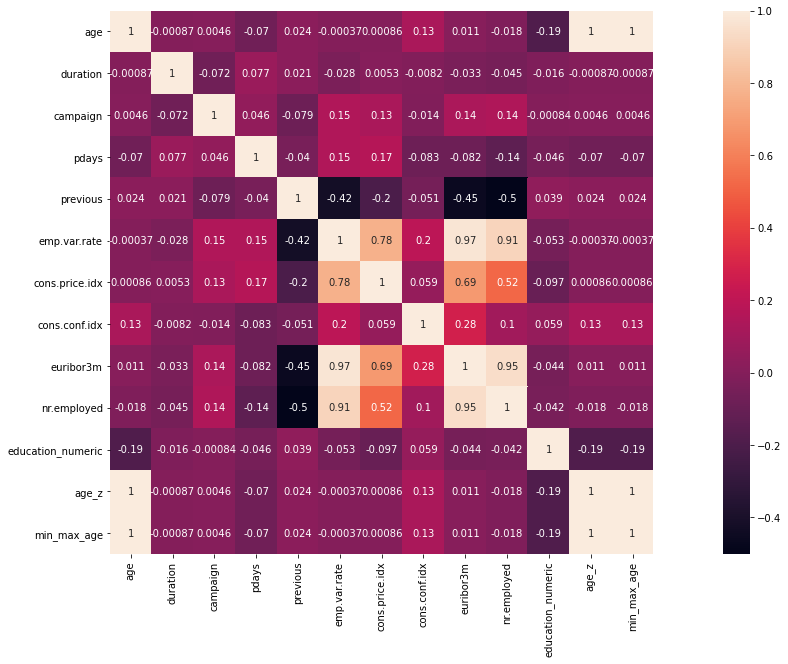

In [91]:
#heat map by parisan for bank_data

print("Correlation Matrix","\n")
correlation = bank_data.corr(method = "pearson")
plt.figure(figsize = (25,10))
sns.heatmap(correlation, vmax = 1, square = True, annot = True)
plt.show()

In [92]:
bank_data.groupby(['education','job']).size()

education  job         
basic.4y   admin.            77
           blue-collar     2318
           entrepreneur     137
           housemaid        474
           management       100
                           ... 
unknown    services         150
           student          167
           technician       212
           unemployed        19
           unknown          131
Length: 90, dtype: int64